## Final Project, Part 3: Technical Notebook

##### Build and document a working model, prototype, recommendation, or solution.

Develop a prototype model or process to successfully resolve the business problem you've chosen. Document your work in a technical notebook that can be shared with your peers.

Build upon your earlier analysis, folling the performance metrics you established as part of your problem's evaluation criteria. Demonstrate your approach logically, including all relevant code and data. Polish your notebook for peer audiences by cleanly formatting sections, headers, and descriptions in markdown. Include comments in any code.

#### Requirements

A detailed Jupyter Notebook with a summary of your analysis, approach, and evaluation metrics.
Clearly formatted structure with section headings and markdown descriptions.
Comments explaining your code.

##### Note: Here are some things to consider in your notebook: sample size, correlations, feature importance, unexplained variance or outliers, variable selection, train/test comparison, and any relationships between your target and independent variables.

#### Submission

Submit or share your project brief as per your instructor's directions.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
import sklearn.metrics
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from datetime import datetime
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
loc = pd.read_csv('/Users/rcalaquian/ga-projects/data/loc_sample1.csv', 
                  parse_dates=['as_of_date', 'firstdate', 'last_cleared_payment_date', 'first_draw_date'],
                  date_parser=lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [4]:
loc.head()

,loan_id,as_of_date,total_outstanding_principal,last_draw_date,dpd_calendar,last_cleared_payment_date,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,...,age_months,lifetime_utilization_pct,lifetime_draw_count,closedate,wa_credit_score__c,dpd10slope,firstdate,lastdlqdate,firstdlq,write_off_flag
0,A0005379235221,2015-09-30,5813.81,2015-05-11,64.0,2015-09-30,10000.0,NaN,NaN,3636.07,...,6,0.775821,4,2015-03-27,625.0,1.145455,2015-03-27,2015-07-28,2015-05-13,0
1,A0005379235221,2015-10-07,5467.31,2015-05-11,71.0,2015-10-07,10000.0,NaN,NaN,3635.78,...,7,0.768664,4,2015-03-27,625.0,0.636364,2015-03-27,2015-07-28,2015-05-13,0
2,A0005379235221,2015-10-28,4413.35,2015-05-11,71.0,2015-10-28,10000.0,NaN,NaN,3634.91,...,7,0.743199,4,2015-03-27,625.0,0.127273,2015-03-27,2015-07-28,2015-05-13,0
3,A0005379235221,2015-11-04,4057.15,2015-05-11,71.0,2015-11-04,10000.0,NaN,NaN,3634.62,...,8,0.733564,4,2015-03-27,625.0,0.509091,2015-03-27,2015-07-28,2015-05-13,0
4,A0005379235221,2015-11-11,4057.15,2015-05-11,78.0,2015-11-04,10000.0,NaN,NaN,3634.62,...,8,0.723586,4,2015-03-27,625.0,1.209091,2015-03-27,2015-07-28,2015-05-13,0


In [5]:
# displays a table of detailed distribution information for each of the all 
# attributes in our data frame
loc.describe()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
count,1.103489e+06,1.003810e+06,1.103489e+06,104131.000000,104131.000000,1.103489e+06,1.103489e+06,1.103489e+06,1.100756e+06,1.103489e+06,1.103489e+06,1.103489e+06,1.103489e+06,1.103489e+06,1.103489e+06,1.103489e+06,1.100990e+06,1.098492e+06,1.103489e+06
mean,7.873473e+03,3.797971e+00,1.928879e+04,12212.162007,1294.452012,2.209803e+02,2.579477e+01,4.115748e-01,3.155819e+03,2.842991e+04,3.490378e+00,2.215841e+00,1.920723e+00,1.420939e+01,4.427196e-01,9.691105e+00,6.810809e+02,3.286192e-02,9.436524e-02
std,9.473122e+03,2.081864e+01,1.210724e+04,6569.400845,942.609765,1.348651e+03,1.820852e+02,3.639264e-01,3.499048e+03,3.559053e+04,7.662478e+00,6.825719e+00,6.265269e+00,9.476268e+00,2.585671e-01,1.104178e+01,5.271456e+01,1.587804e+00,2.923363e-01
min,-1.642722e+04,0.000000e+00,6.000000e+03,0.010000,0.000000,0.000000e+00,0.000000e+00,-1.156365e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.891690e-03,1.000000e+00,4.430000e+02,-4.790909e+01,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.300000e+04,8236.790000,609.900000,0.000000e+00,0.000000e+00,0.000000e+00,6.839775e+02,6.622990e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,2.246827e-01,2.000000e+00,6.430000e+02,0.000000e+00,0.000000e+00
50%,5.299240e+03,0.000000e+00,1.700000e+04,11884.310000,1117.340000,0.000000e+00,0.000000e+00,3.929526e-01,1.922910e+03,1.805962e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,4.387325e-01,6.000000e+00,6.760000e+02,0.000000e+00,0.000000e+00
75%,1.260014e+04,0.000000e+00,2.000000e+04,14948.960000,1767.200000,0.000000e+00,0.000000e+00,7.815777e-01,4.433100e+03,3.873118e+04,2.000000e+00,1.000000e+00,2.000000e+00,2.100000e+01,6.587690e-01,1.300000e+01,7.140000e+02,0.000000e+00,0.000000e+00
max,1.000000e+05,6.590000e+02,1.000000e+05,99729.970000,8410.920000,6.282918e+04,7.968240e+03,2.272423e+00,3.671027e+04,1.258478e+06,6.400000e+01,8.300000e+01,3.240000e+02,4.500000e+01,1.309138e+00,1.430000e+02,8.500000e+02,5.709091e+01,1.000000e+00


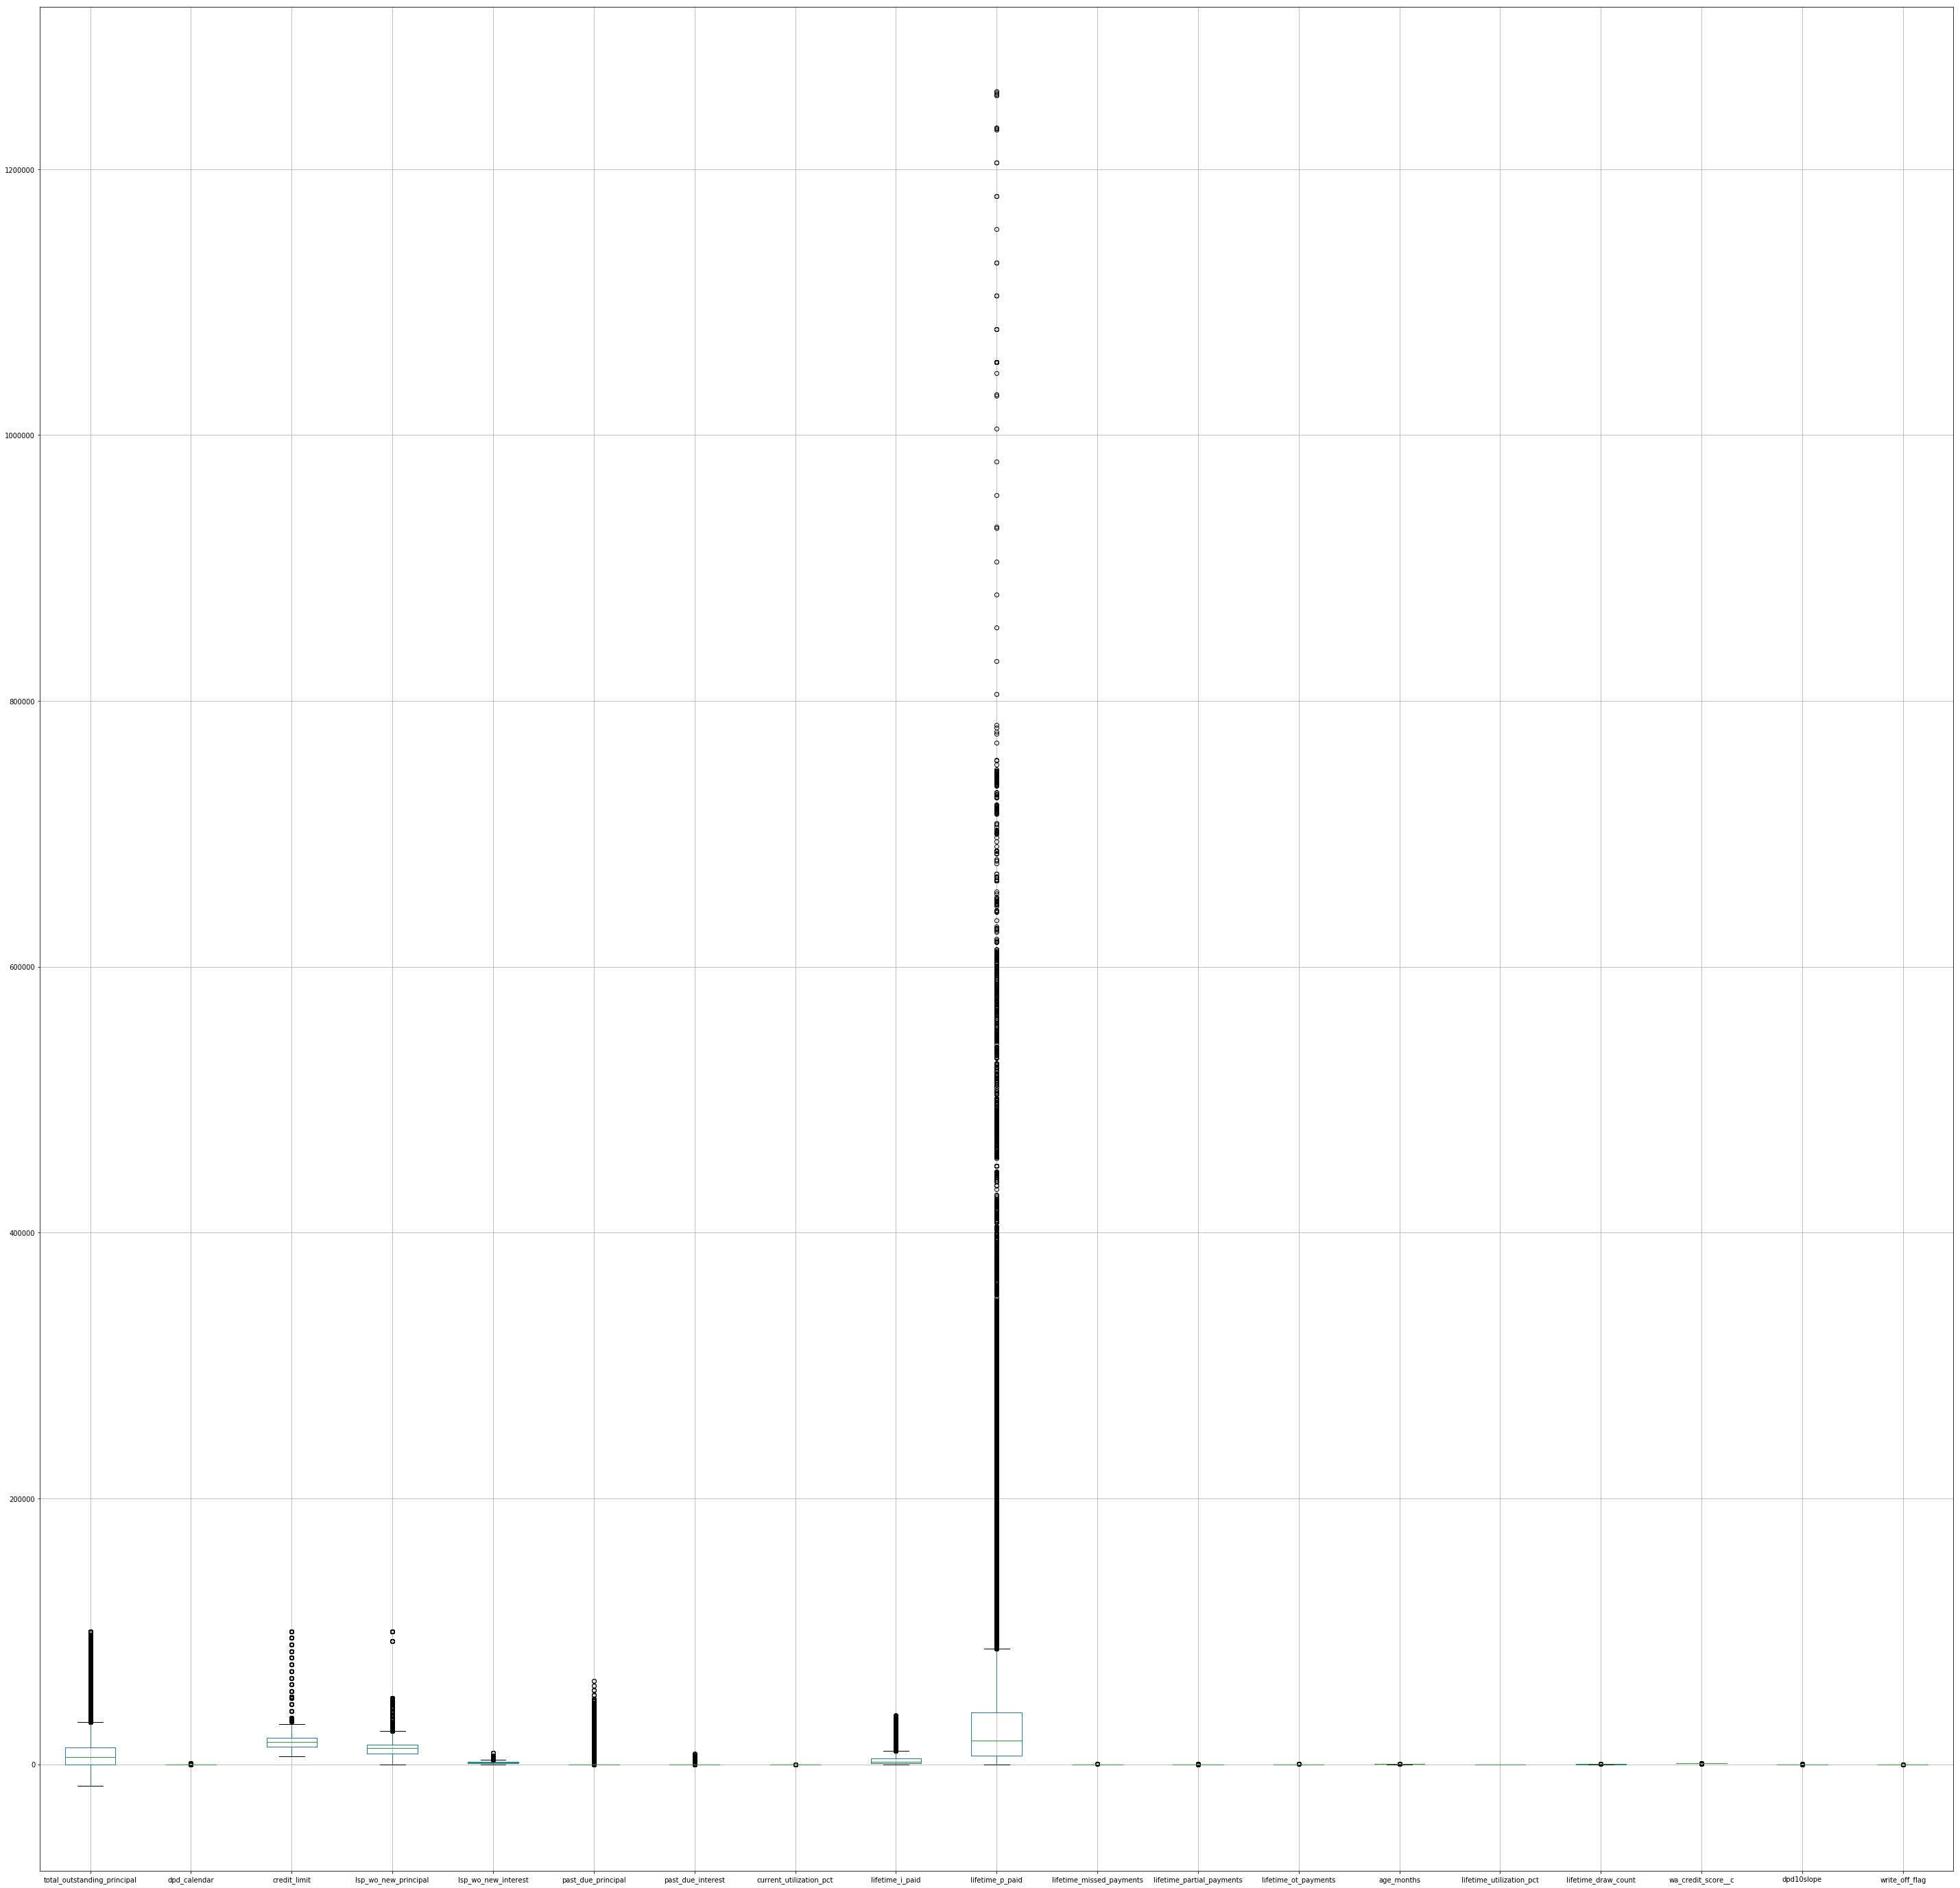

In [6]:
loc.boxplot(figsize=(50,50))

write_off_flag
0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

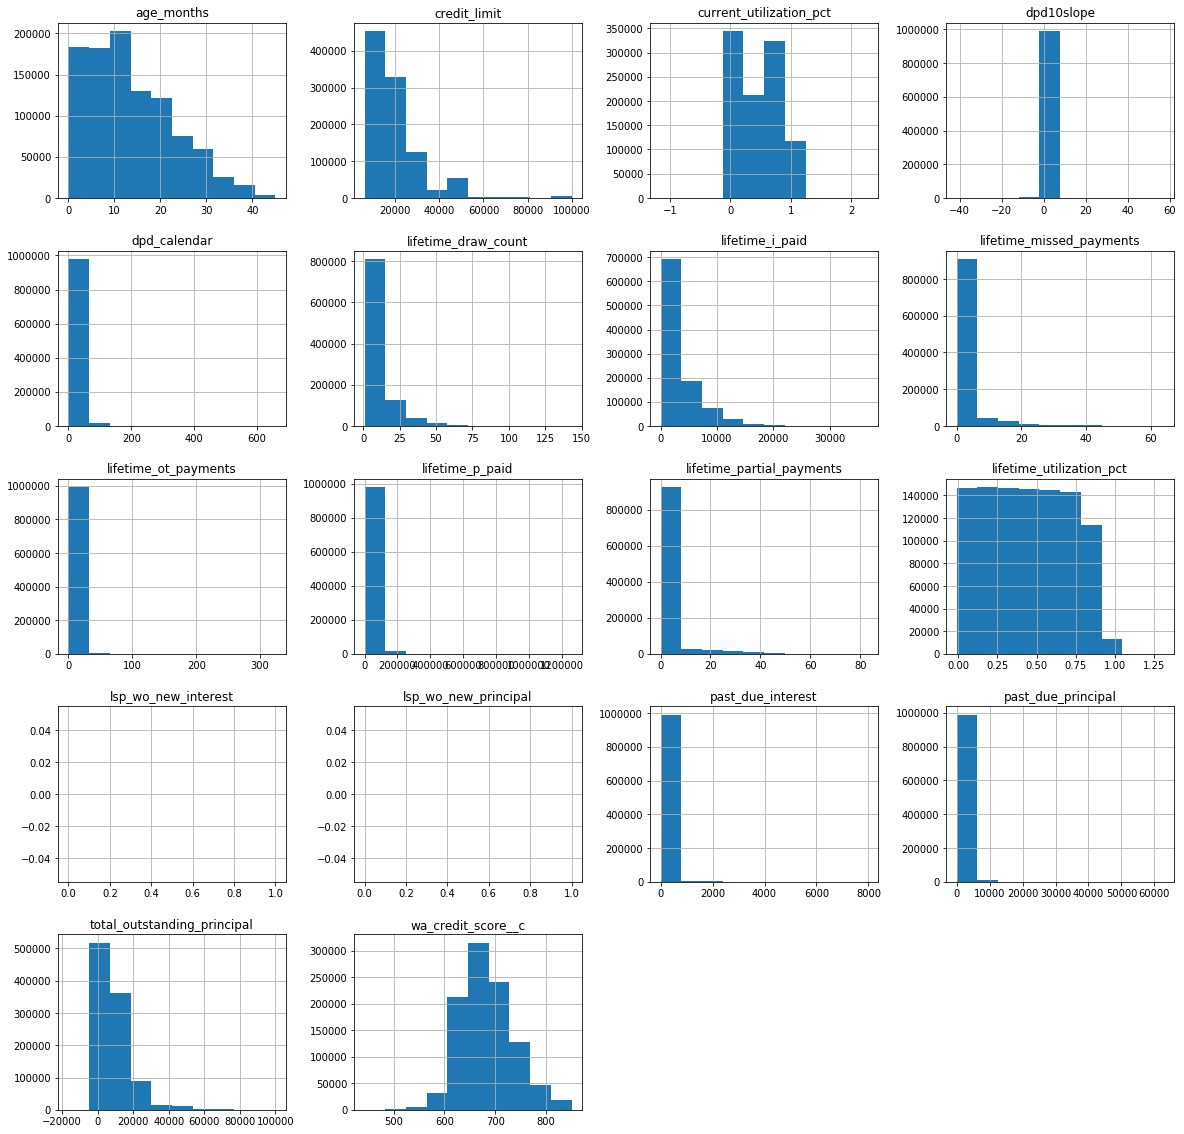

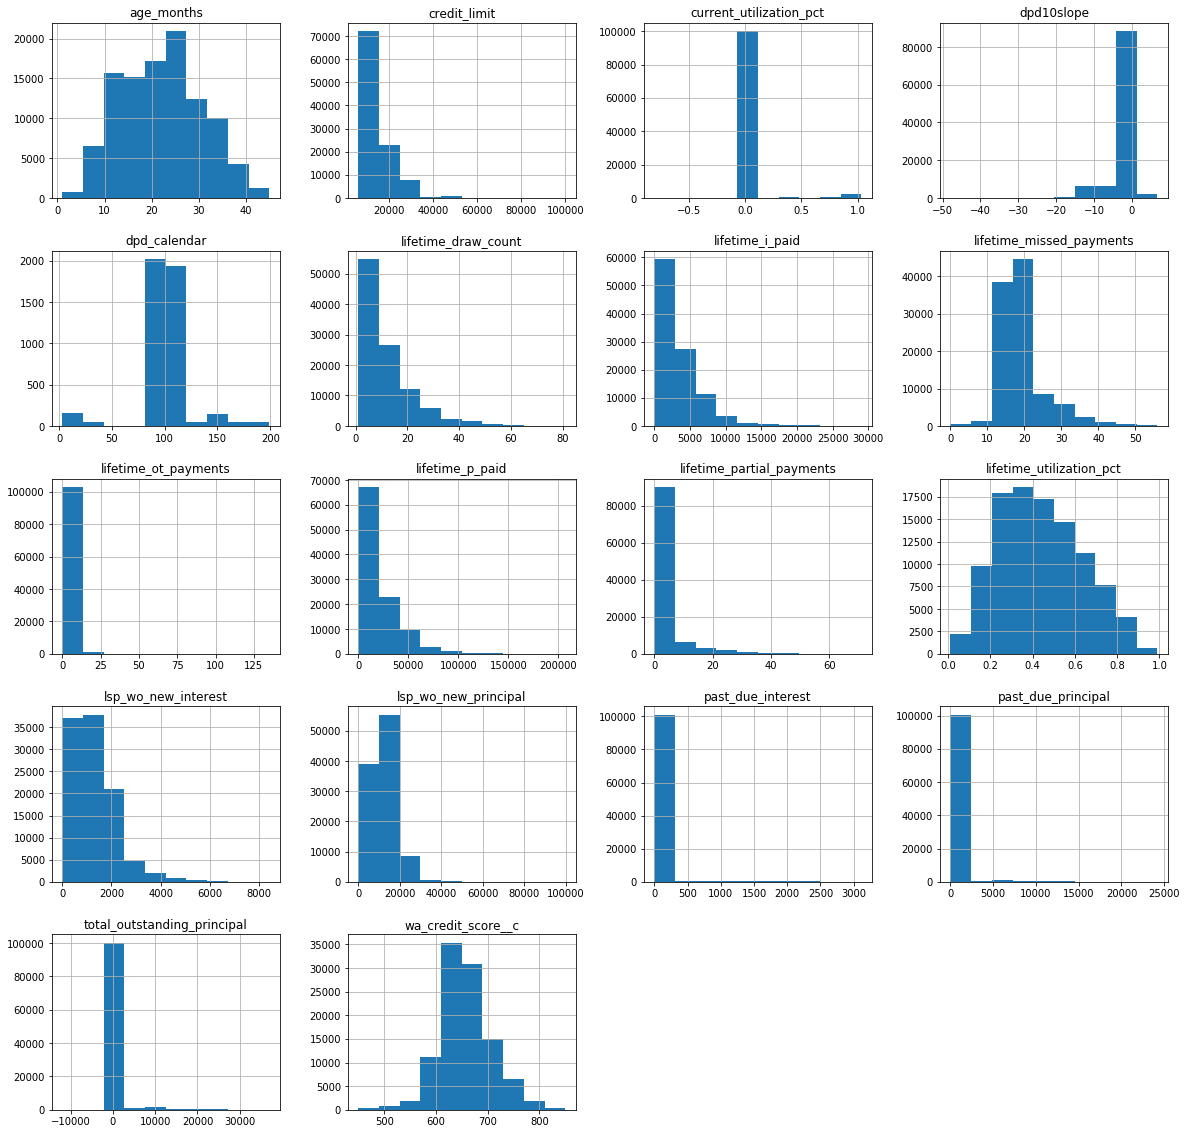

In [7]:
# features and write_off_flag relationship
loc.groupby('write_off_flag').hist(figsize=(20,20))

In [195]:
loc.groupby('write_off_flag').mean()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope
write_off_flag,,,,,,,,,,,,,,,,,,
0,8647.802313,3.371671,19644.284631,NaN,NaN,213.916959,24.315698,0.451538,3143.922997,29317.423934,1.873187,2.131606,1.984587,13.398705,0.442950,9.546885,683.555849,0.169784
1,442.135403,99.491240,15877.077911,12212.162007,1294.452012,288.767940,39.989606,0.028039,3269.679091,19912.334591,19.010765,3.024248,1.307814,21.989628,0.440508,11.075203,657.349283,-1.275182


In [ ]:
scatter_matrix(loc, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [9]:
# Select X and y
y = loc['write_off_flag']
X = loc[[column for column in loc.columns.values.tolist() if column not in y]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train.corr()

,total_outstanding_principal,dpd_calendar,credit_limit,lsp_wo_new_principal,lsp_wo_new_interest,past_due_principal,past_due_interest,current_utilization_pct,lifetime_i_paid,lifetime_p_paid,lifetime_missed_payments,lifetime_partial_payments,lifetime_ot_payments,age_months,lifetime_utilization_pct,lifetime_draw_count,wa_credit_score__c,dpd10slope,write_off_flag
total_outstanding_principal,1.000000,0.016324,0.527652,0.101308,0.025504,0.156301,0.147402,0.716900,0.369855,0.275586,-0.223807,-0.033833,-0.009584,-0.156640,0.437372,0.259600,0.055065,0.126563,-0.252495
dpd_calendar,0.016324,1.000000,-0.045591,0.076744,0.168518,0.607087,0.530546,0.062462,0.027657,-0.012545,0.435016,0.046089,0.001427,0.035774,0.094638,0.030461,-0.055997,0.553840,0.307831
credit_limit,0.527652,-0.045591,1.000000,0.737307,0.404859,0.032777,0.014809,-0.015715,0.203968,0.299343,-0.111150,-0.048410,0.001176,-0.063584,-0.104251,0.026245,0.255274,-0.001454,-0.090495
lsp_wo_new_principal,0.101308,0.076744,0.737307,1.000000,0.644332,0.091070,0.094506,0.039036,0.328288,0.348544,-0.086378,-0.027944,0.039329,0.077529,0.222879,0.325360,0.117232,-0.001895,NaN
lsp_wo_new_interest,0.025504,0.168518,0.404859,0.644332,1.000000,0.017098,0.053560,-0.008300,0.170385,0.163686,0.276540,-0.072382,-0.022175,0.194668,0.094120,0.177682,0.046406,0.012749,NaN
past_due_principal,0.156301,0.607087,0.032777,0.091070,0.017098,1.000000,0.840007,0.165675,0.100559,0.033880,0.207210,0.035268,-0.001593,0.027442,0.167358,0.081578,-0.044759,0.458798,0.017505
past_due_interest,0.147402,0.530546,0.014809,0.094506,0.053560,0.840007,1.000000,0.174979,0.071943,0.024133,0.184661,0.006127,-0.005884,0.023270,0.150210,0.073307,-0.036575,0.438200,0.026911
current_utilization_pct,0.716900,0.062462,-0.015715,0.039036,-0.008300,0.165675,0.174979,1.000000,0.282458,0.120411,-0.274349,-0.016740,-0.011122,-0.214254,0.669619,0.305941,-0.113765,0.203126,-0.339634
lifetime_i_paid,0.369855,0.027657,0.203968,0.328288,0.170385,0.100559,0.071943,0.282458,1.000000,0.660318,0.038186,0.197334,0.141794,0.561133,0.448756,0.777925,-0.075788,0.007664,0.011157
lifetime_p_paid,0.275586,-0.012545,0.299343,0.348544,0.163686,0.033880,0.024133,0.120411,0.660318,1.000000,0.037289,0.247959,0.358237,0.426920,0.212351,0.577494,0.042255,0.002443,-0.076802


In [21]:
# Data cleanup and ...
bit_flag = [0, 1]

X_train['missed_sub_partial'] = X_train['lifetime_missed_payments'] - X_train['lifetime_partial_payments']
X_train['current_utilization_pct'].fillna(0, inplace=True)

X_train['age_months'] = np.floor(((X_train['as_of_date'] - X_train['firstdate'])/np.timedelta64(1, 'D'))/30)
X_train['lifetime_missed_payments_norm_age'] = X_train['lifetime_missed_payments'] / (X_train['age_months'] + 1)

X_train['first_draw_since_close'] = np.maximum((X_train['first_draw_date'] - X_train['firstdate'])/np.timedelta64(1, 'D'), 0)
X_train['first_draw_since_close_factor'] = np.where(X_train['first_draw_since_close'].isin(bit_flag), 1, 0)
X_train['dpd10slope'].fillna(0, inplace=True)
X_train['count'] = np.maximum(X_train['dpd10slope'], 0)
X_train['count10'] = np.where(X_train['count'] >= 10, 1, 0)

X_train['ipratio'] = np.minimum(np.where(X_train['lifetime_p_paid'] <= 0 | X_train['lifetime_p_paid'].isnull(), 1,
                                     X_train['lifetime_i_paid']/X_train['lifetime_p_paid']), 1)
X_train['has_ipratio'] = np.where(X_train['lifetime_p_paid'] > 0, 1, 0)
X_train['wa_credit_score__c'].fillna(678, inplace=True) 

X_train['pastdue_ipratio'] = np.where(X_train['past_due_principal'] > 0, 
                                   X_train['past_due_interest']/X_train['past_due_principal'], 1)
X_train['has_pastdue_principal'] = np.where(X_train['past_due_principal'] > 0, 1, 0)

X_train['daysSinceLastPay'] = np.floor(((X_train['as_of_date'] - X_train['last_cleared_payment_date'])/np.timedelta64(1, 'D')))
X_train['daysSinceLastPayInt'] = X_train['daysSinceLastPay']/7


#---
X_test['missed_sub_partial'] = X_test['lifetime_missed_payments'] - X_test['lifetime_partial_payments']
X_test['current_utilization_pct'].fillna(0, inplace=True)

X_test['age_months'] = np.floor(((X_test['as_of_date'] - X_test['firstdate'])/np.timedelta64(1, 'D'))/30)
X_test['lifetime_missed_payments_norm_age'] = X_test['lifetime_missed_payments'] / (X_test['age_months'] + 1)
X_test['first_draw_since_close'] = np.maximum((X_test['first_draw_date'] - X_test['firstdate'])/np.timedelta64(1, 'D'), 0)
X_test['first_draw_since_close_factor'] = np.where(X_test['first_draw_since_close'].isin(bit_flag), 1, 0)    
X_test['wa_credit_score__c'].fillna(678, inplace=True)

X_test['dpd10slope'].fillna(0, inplace=True)
X_test['count'] = np.maximum(X_test['dpd10slope'], 0)
X_test['count10'] = np.where(X_test['count'] >= 10, 1, 0)

X_test['ipratio'] = np.minimum(np.where(X_test['lifetime_p_paid'] <= 0 | X_test['lifetime_p_paid'].isnull(), 1, X_test['lifetime_i_paid']/X_test['lifetime_p_paid']), 1)
X_test['has_ipratio'] = np.where(X_test['lifetime_p_paid'] > 0, 1, 0)

X_test['pastdue_ipratio'] = np.where(X_test['past_due_principal'] > 0, X_test['past_due_interest']/X_test['past_due_principal'], 1)
X_test['has_pastdue_principal'] = np.where(X_test['past_due_principal'] > 0, 1, 0)

X_test['daysSinceLastPay'] = np.floor(((X_test['as_of_date'] - X_test['last_cleared_payment_date'])/np.timedelta64(1, 'D')))
X_test['daysSinceLastPayInt'] = X_test['daysSinceLastPay']/7


/Users/rcalaquian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/rcalaquian/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/rcalaquian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

/Users/rcalaquian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rcalaquian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rcalaquian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ab78338d0>,
      dtype=object)

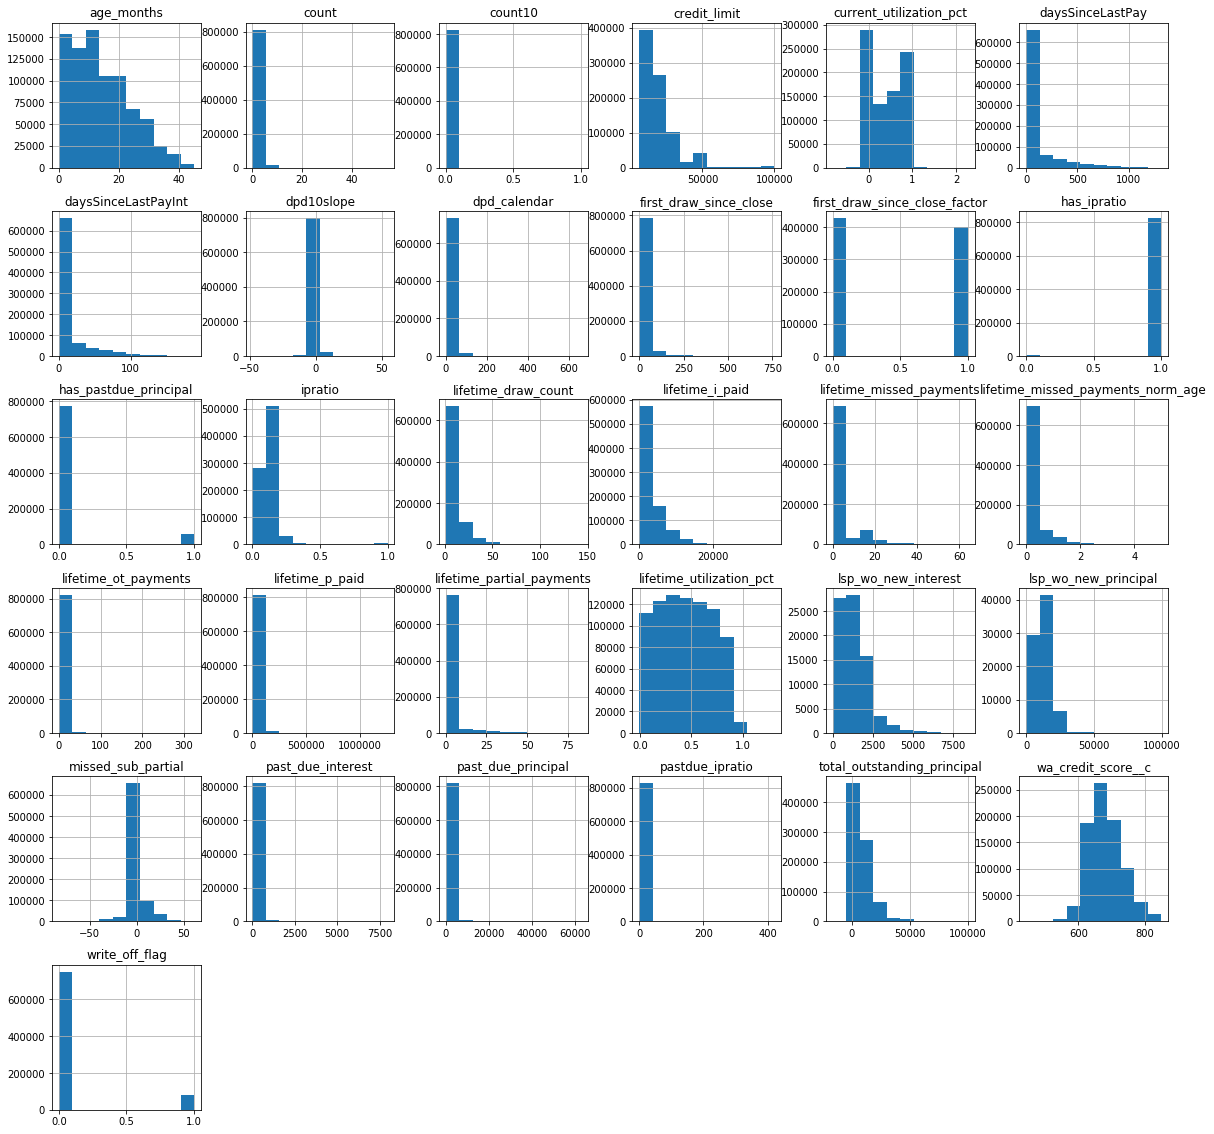

In [22]:
X_train.hist(figsize=(20,20))

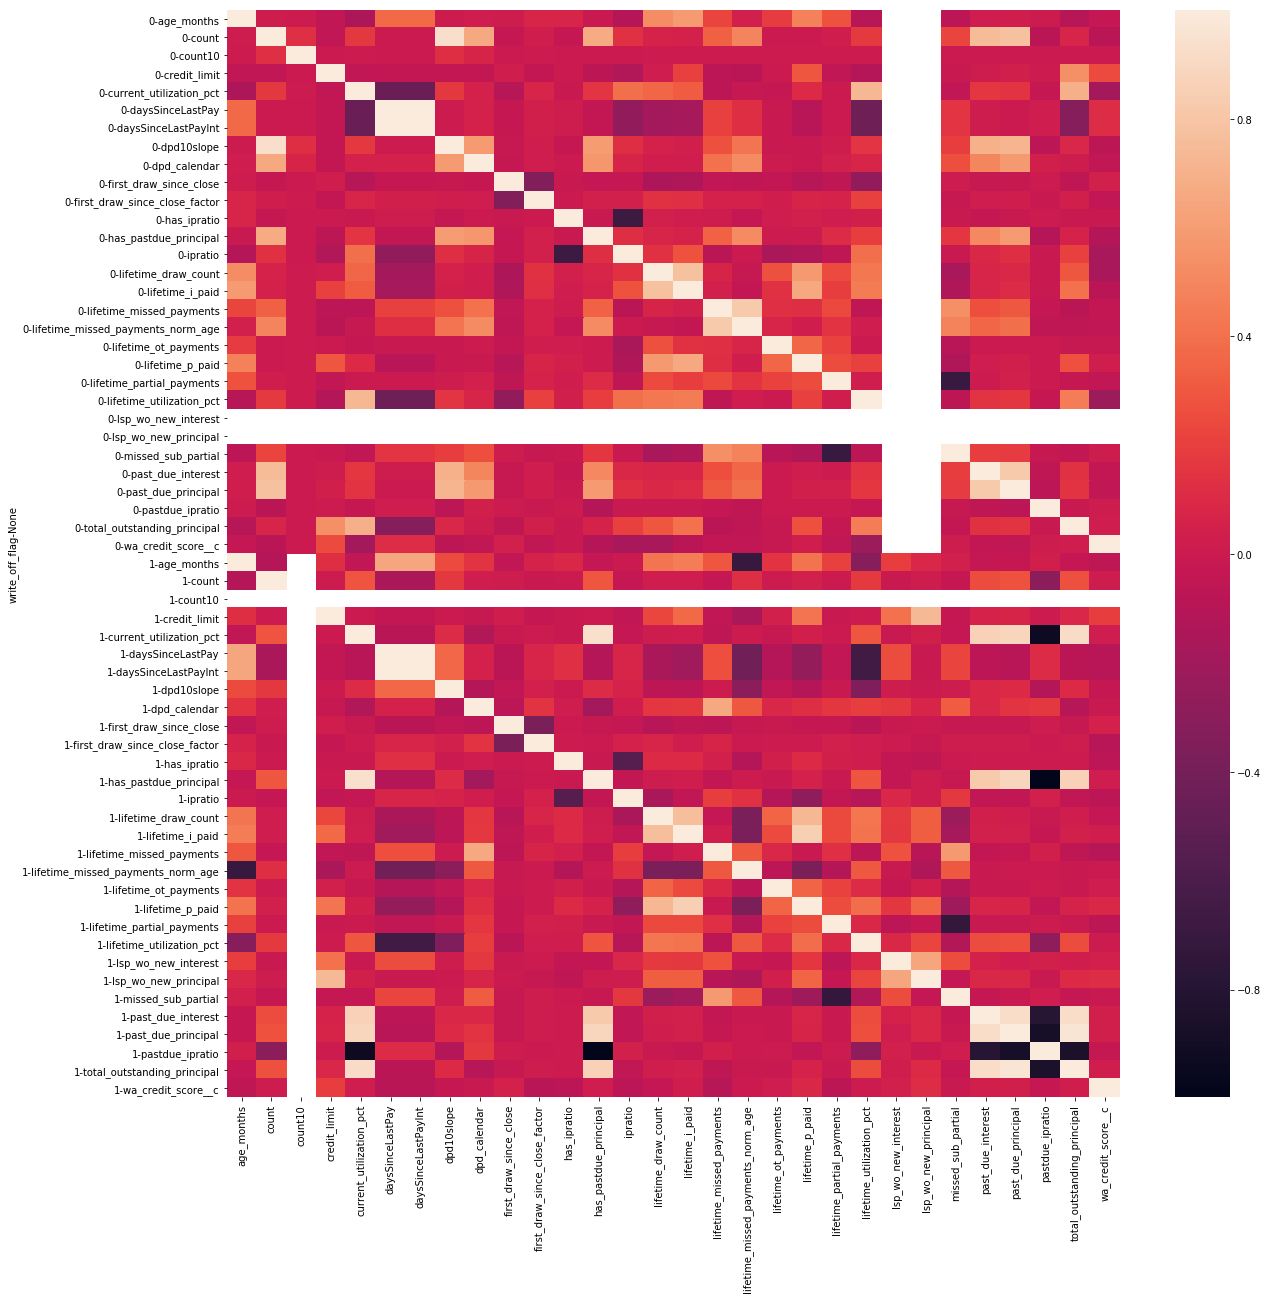

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X_train.groupby('write_off_flag').corr())

In [30]:
X_train.groupby('write_off_flag').corr()

age_months     count  \
write_off_flag                                                           
0              age_months                           1.000000  0.009586   
               count                                0.009586  1.000000   
               count10                              0.003130  0.127344   
               credit_limit                        -0.050264 -0.046996   
               current_utilization_pct             -0.142401  0.165648   
               daysSinceLastPay                     0.373763 -0.003149   
               daysSinceLastPayInt                  0.373763 -0.003149   
               dpd10slope                           0.003605  0.935482   
               dpd_calendar                         0.019837  0.651028   
               first_draw_since_close               0.013449 -0.024579   
               first_draw_since_close_factor        0.075358  0.032014   
               has_ipratio                          0.073605 -0.024937   
               has_pastdue_principal               -0.007006  0.666240   
               ipratio                             -0.107307  0.139121   
               lifetime_draw_count                  0.528368  0.063654   
               lifetime_i_paid                      0.589721  0.052562   
               lifetime_missed_payments             0.223465  0.333052   
               lifetime_missed_payments_norm_age    0.043156  0.492303   
               lifetime_ot_payments                 0.182962 -0.003689   
               lifetime_p_paid                      0.471169 -0.004882   
               lifetime_partial_payments            0.274953  0.026498   
               lifetime_utilization_pct            -0.098769  0.179006   
               lsp_wo_new_interest                       NaN       NaN   
               lsp_wo_new_principal                      NaN       NaN   
               missed_sub_partial                  -0.074196  0.223511   
               past_due_interest                    0.022741  0.746878   
               past_due_principal                   0.030410  0.775583   
               pastdue_ipratio                      0.005783 -0.082002   
               total_outstanding_principal         -0.099912  0.078237   
               wa_credit_score__c                  -0.037599 -0.079749   
1              age_months                           1.000000 -0.108000   
               count                               -0.108000  1.000000   
               count10                                   NaN       NaN   
               credit_limit                         0.125516  0.003973   
               current_utilization_pct             -0.046666  0.285712   
               daysSinceLastPay                     0.646341 -0.154826   
               daysSinceLastPayInt                  0.646341 -0.154826   
               dpd10slope                           0.243751  0.166497   
               dpd_calendar                         0.148455  0.019176   
               first_draw_since_close              -0.045649  0.010204   
               first_draw_since_close_factor        0.063658 -0.008885   
               has_ipratio                          0.092133  0.000407   
               has_pastdue_principal               -0.036613  0.290823   
               ipratio                             -0.005575 -0.034517   
               lifetime_draw_count                  0.421189  0.018403   
               lifetime_i_paid                      0.461111  0.021083   
               lifetime_missed_payments             0.296392 -0.035841   
               lifetime_missed_payments_norm_age   -0.707702  0.123566   
               lifetime_ot_payments                 0.147967  0.007001   
               lifetime_p_paid                      0.414639  0.040686   
               lifetime_partial_payments            0.201539 -0.003317   
               lifetime_utilization_pct            -0.317045  0.177540   
               lsp_wo_new_interest                  0.

In [16]:
target=['write_off_flag']
features = ['missed_sub_partial','current_utilization_pct','lifetime_missed_payments_norm_age',
            'has_ipratio','count10','has_pastdue_principal', 'wa_credit_score__c', 'first_draw_since_close_factor']  

In [17]:
model = smf.Logit(y_train, X_train[features])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.139326
         Iterations 23


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         write_off_flag   No. Observations:               827616
Model:                          Logit   Df Residuals:                   827608
Method:                           MLE   Df Model:                            7
Date:                Tue, 15 May 2018   Pseudo R-squ.:                  0.5536
Time:                        19:41:42   Log-Likelihood:            -1.1531e+05
converged:                       True   LL-Null:                   -2.5833e+05
                                        LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
missed_sub_partial                    0.0966      0.001    116.429      0.000       0.095       0.098
current_utilization_pct              -4.9116      0.036   -137.295      0.000      -4.982      -4.841
lifetime_missed_payments_norm_age     1.5664      0.015    103.929      0.000       1.537       1.596
has_ipratio                           2.4995      0.060     41.688      0.000       2.382       2.617
count10                             -33.4487   3.36e+07  -9.94e-07      1.000   -6.59e+07    6.59e+07
has_pastdue_principal                -1.6483      0.033    -49.774      0.000      -1.713      -1.583
wa_credit_score__c                   -0.0079   8.85e-05    -89.500      0.000      -0.008      -0.008
first_draw_since_close_factor         0.5513      0.011     49.138      0.000       0.529       0.573
=====================================================================================================
"""

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train[features], y_train)
ypred = logreg.predict(X_train[features])

#fpr, tpr, thresholds = roc_curve(y_train, ypred)

#plt.plot(fpr, tpr, label='ROC Curve')
#plt.xlabel("FPR")
#plt.ylabel("TPR")

#close_zero = np.argmin(np.abs(thresholds))
#plt.plot(fpr[close_zero], tpr[close_zero])

#plt.legend(loc=4)

In [179]:
logreg.score(X_train[features], y_train)

0.9533201388083362

In [180]:
logreg.coef_[0][0]

0.09783516708178074

In [181]:
predictions = logreg.predict(X_train[features])
print(classification_report(y_train, predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97    749389
          1       0.79      0.68      0.73     78227

avg / total       0.95      0.95      0.95    827616



In [184]:
classifier=DecisionTreeClassifier(max_depth = 5)
classifier=classifier.fit(X_train[features],y_train)
predictions=classifier.predict(X_train[features])

sklearn.metrics.confusion_matrix(y_train,predictions)

array([[736621,  12768],
       [  7561,  70666]])

In [185]:
sklearn.metrics.accuracy_score(y_train, predictions)

0.9754366759463327

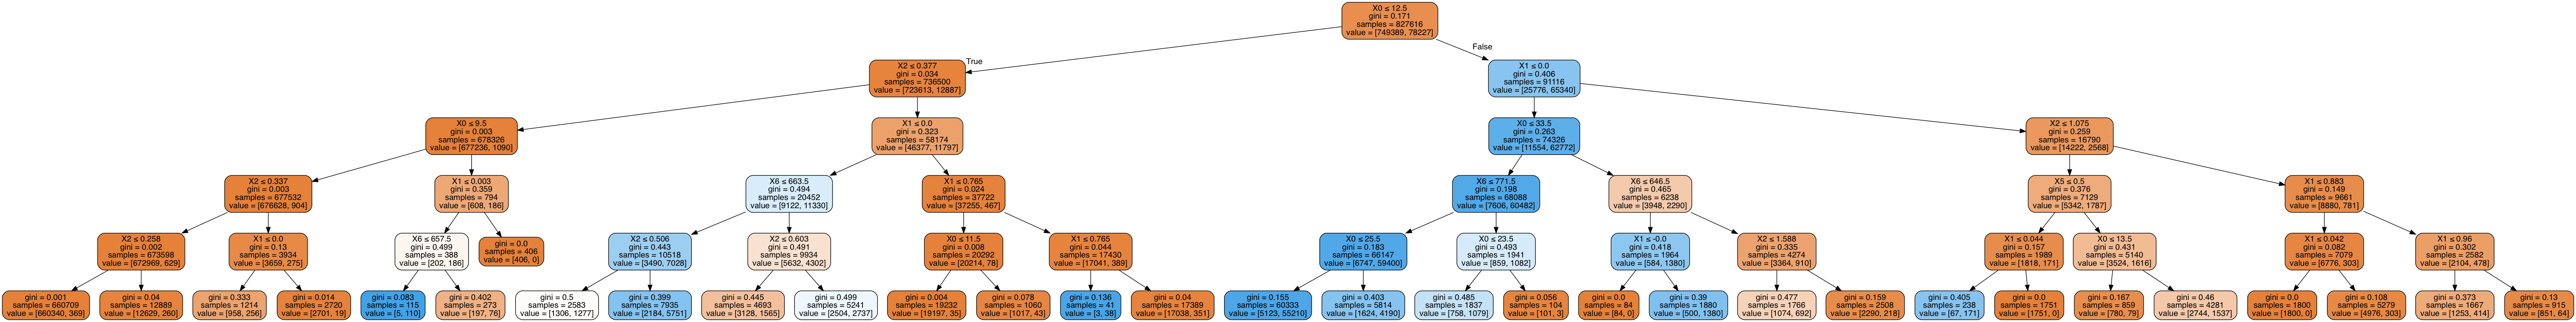

In [186]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [111]:
classifier=DecisionTreeClassifier(max_depth = 5)
classifier=classifier.fit(X_train[features],y_train)
predictions=classifier.predict(X_test[features])

sklearn.metrics.confusion_matrix(y_test,predictions)

array([[245674,   4295],
       [  2418,  23486]])

In [ ]:
classifier.feature_importances_

In [112]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.9756663392213084

In [182]:
classifier.feature_importances_

array([0.74395568, 0.19278832, 0.0465049 , 0.        , 0.        ,
       0.00133924, 0.01541186, 0.        ])

In [187]:
precision_score(y_train, predictions)

0.8469688616151688

In [190]:
recall_score(y_train, predictions)

0.9033453922558707

In [189]:
f1_score(y_train, predictions)

0.8742492004874396